In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('StudentsPerformance.csv')


In [2]:
df.shape

(1000, 8)

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.isnull().mean()*100

,0
gender,0.0
race/ethnicity,0.0
parental level of education,0.0
lunch,0.0
test preparation course,0.0
math score,0.0
reading score,0.0
writing score,0.0


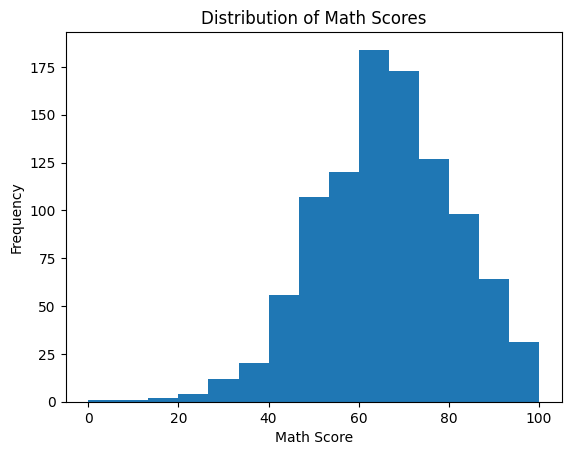

In [11]:
plt.hist(df['math score'], bins=15)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


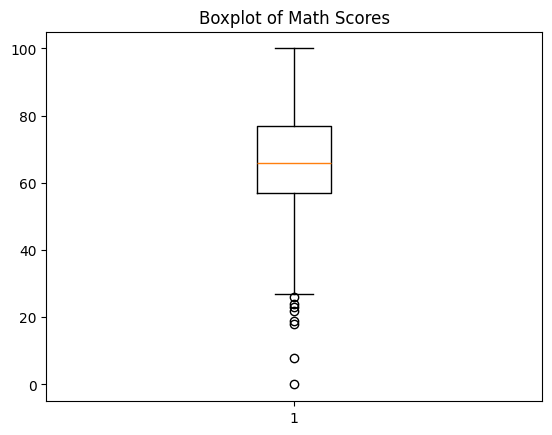

In [12]:
plt.boxplot(df['math score'])
plt.title('Boxplot of Math Scores')
plt.show()


In [14]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(27.0), np.float64(107.0))

In [15]:
df['math_outlier'] = (
    (df['math score'] < lower_bound) |
    (df['math score'] > upper_bound)
).astype(int)

df['math_outlier'].value_counts()


,count
math_outlier,
0,992
1,8


In [19]:
df['math score'] = df['math score'].clip(
    lower=lower_bound,
    upper=upper_bound
)

In [20]:
df.corr(numeric_only=True)


,math score,reading score,writing score,math_outlier
math score,1.000000,0.815908,0.800008,-0.235812
reading score,0.815908,1.000000,0.954598,-0.223348
writing score,0.800008,0.954598,1.000000,-0.234611
math_outlier,-0.235812,-0.223348,-0.234611,1.000000


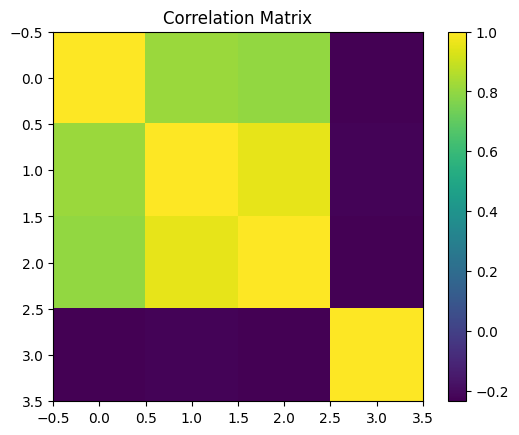

In [22]:
plt.imshow(df.corr(numeric_only=True))
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()


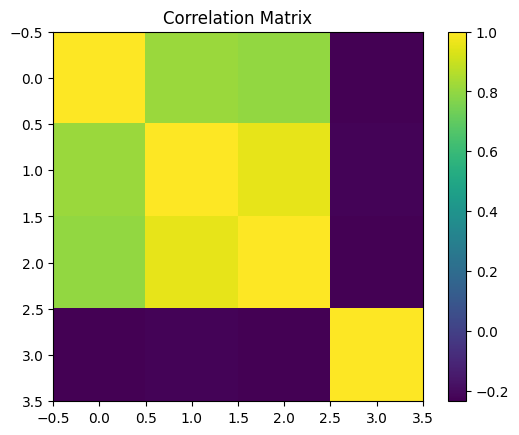

In [23]:
plt.imshow(df.corr(numeric_only=True))
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()


In [24]:
df.to_csv('cleaned_dataset.csv', index=False)
